<a href="https://colab.research.google.com/github/ahmadSoliman94/Machine-Learning/blob/main/ML/Projects/Electro-Pi-projects/Regression/CompareMyCode/Kopie_von_CompareYourCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison .. Who is better you ? or scikit learn !

* Use All your Codes that you 've Developed for Machine Learning  [ Your Package ]

* And  Then Run Scikit Learn Code For the Same Task then notice who will do better.

In [ ]:
# Colab Block Of Code 
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Colab Code#
import os
os.chdir('drive/My Drive/Colab Notebooks/')

In [ ]:
!ls 

'Kopie von Classification.ipynb'
'Kopie von CompareYourCode.ipynb'
'Kopie von Mins Of Coding2.ipynb'
'Kopie von Multiple Linear Regression.ipynb'
'Kopie von Numpy.ipynb'
'Kopie von pandas.ipynb'
'Kopie von Pre_processing.ipynb'
'Kopie von ٌRegression CapStone.ipynb'
'Kopie von Regressors.ipynb'
'Kopie von Simple Linear Regression.ipynb'
'Kopie von Transformation.ipynb'
 __pycache__
 statistic.py
 Transformation.py


**First**: Load Your Package 

In [ ]:
# you have two ways 
# from ...........NameofyourPackageFile...........  import * 
#if you use OOP
import numpy as np   # For Matrices Manipulations
import pandas as pd  # For Data frames etc 
import openpyxl   # For Excel Files
import os   # For Changing to the Correct Directory 
from Transformation import Transformer

Check your Result here : 1.0  The Answer Should  be equal to 1.0


**Second**  Let's import Our Dependencies and  Load the data then  Transfer it into Numpy Array of Features and Lables.

In [ ]:
data=pd.read_excel('/content/drive/MyDrive/Fusion/slr02.xlsx', engine = 'openpyxl')
X= data.iloc[:,:-1].values
y=data.iloc[:,-1:].values
#print Shapes and Types
print(f'Shape of X: {X.shape}' , f'Type:  {type(X)}')
print(f'Shape of y: {y.shape}' , f'Type:  {type(y)}')

Shape of X: (15, 1) Type:  <class 'numpy.ndarray'>
Shape of y: (15, 1) Type:  <class 'numpy.ndarray'>


In [ ]:
data

,X,Y
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998
5,15.500000,75.199997
6,14.700000,69.699997
7,17.100000,82.000000
8,15.400000,69.400002
9,16.200001,83.300003


In [ ]:
def tt_split(X, y, test_size=None,random_state=None):
    np.random.seed(random_state)
    i = int((1 - test_size) * X.shape[0]) 
    o = np.random.permutation(X.shape[0])
    
    X_train, X_test = np.split(np.take(X,o,axis=0), [i])
    y_train, y_test = np.split(np.take(y,o), [i])
    return X_train, X_test, y_train, y_test

**Third** : Load your Train Test Splitter and Transformer to Scale Down the Training and Testing  Features [X_train,X_test] 


In [ ]:
X_train,X_test,y_train,y_test= tt_split(X,y,0.25,42)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print('Training Features Shape ', X_train.shape , 'Testing Features Shape',X_test.shape)
print('Training Labels Shape ', y_train.shape  , 'Testing labels Shape', y_test.shape)

Training Features Shape  (11, 1) Testing Features Shape (4, 1)
Training Labels Shape  (11, 1) Testing labels Shape (4, 1)


In [ ]:
T= Transformer(X_train)
X_train_scaled = T.StandardScalertransform()

In [ ]:
T= Transformer(X_test)
X_test_scaled = T.StandardScalertransform()

In [ ]:
import statistic 
from sklearn.metrics import mean_squared_error, r2_score

x_mean = statistic.statistic.Mean(X_train_scaled)
y_mean = statistic.statistic.Mean(y_train)
cov = statistic.statistic.Covariance(X_train_scaled,x_mean,y_train,y_mean)
var_x = statistic.statistic.Variance(X_train_scaled,x_mean)

In [ ]:
#Put Your Code here
coefficents = statistic.statistic.coefficents(X_train_scaled,cov,var_x,x_mean,y_mean)

**Fifth** Use Your Betas and Testing Data set to Get your own Predictions 

In [ ]:
Predictions = statistic.statistic.SimpleLinearRegression(X_train_scaled,X_test_scaled,coefficents)
Predictions

[array([76.53635901]),
 array([80.48314913]),
 array([89.9554439]),
 array([75.35232123])]

In [ ]:
y_test

array([[79.59999847],
       [80.59999847],
       [84.30000305],
       [69.69999695]])

**Sixth** Evaluate Your Model. 

In [ ]:
MSE= statistic.statistic.MSE(y_test,Predictions)
print('Mean Squared Error between Predictions and Actual is :',MSE)


Mean Squared Error between Predictions and Actual is : 18.333080371551475


**Seventh** Now Let's Start Executing your Opponent! **Scikit-Learn**


In [ ]:
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y,test_size=0.25,random_state=42,shuffle=True )

In [ ]:
print('Training Features Shape ', X_train_.shape , 'Testing Features Shape',X_test_.shape)
print('Training Labels Shape ', y_train_.shape  , 'Testing labels Shape', y_test_.shape)

Training Features Shape  (11, 1) Testing Features Shape (4, 1)
Training Labels Shape  (11, 1) Testing labels Shape (4, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(X_train_)
x_test_sc = scaler.transform(X_test_)

In [ ]:
from sklearn.linear_model import LinearRegression
# Build the Model
linreg = LinearRegression()
# fit the model to the training data (learn the coefficients)
linreg.fit(x_train_sc, y_train_)
# Use the Model for Prediction
y_pred = linreg.predict(x_test_sc)

In [ ]:
y_pred


array([[78.0301368 ],
       [81.5872436 ],
       [91.54713993],
       [80.87581953]])

In [ ]:
y_test_

array([[83.30000305],
       [82.59999847],
       [88.59999847],
       [83.5       ]])

In [ ]:

mean_squared_error(y_test_,y_pred)


11.092282161560412

**Visualize** your Model and Scikit-Learn Model To See the difference in Fittting around the Testing Data 


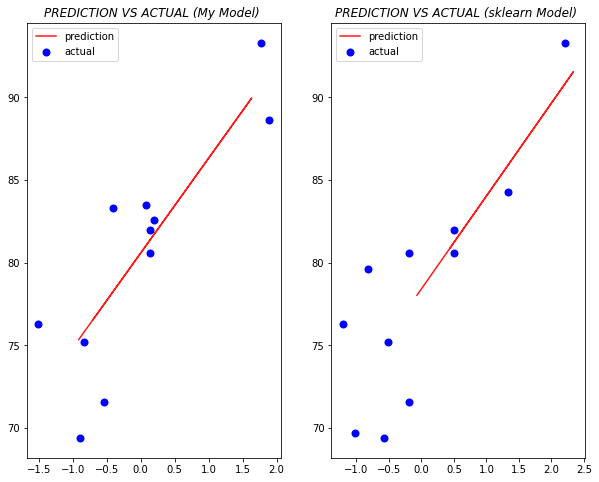

In [ ]:
#Help your self with this Block Read Wisely and know exactly !!!!! What are you trying to plot !!!!!

import matplotlib.pyplot as plt
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,8))
ax1.set_title('PREDICTION VS ACTUAL (My Model) ', fontsize=12 , fontstyle='italic')
ax1.plot(X_test_scaled, Predictions, alpha =0.9, c='r',label='prediction')  ## REPLACE X AND Y WITH  What you want to be plotted 
ax1.scatter(X_train_scaled, y_train, linewidth=2.0,c='b', label='actual') ## FOR Points  o
ax1.legend(loc='upper left')

ax2.set_title('PREDICTION VS ACTUAL (sklearn Model) ', fontsize=12 , fontstyle='italic')
ax2.plot(x_test_sc, y_pred, alpha =0.9, c='r',label='prediction')  ## REPLACE X AND Y WITH  What you want to be plotted 
ax2.scatter(x_train_sc, y_train_, linewidth=2.0,c='b', label='actual') ## FOR Points  o
ax2.legend(loc='upper left')
